###### ComparingTwoAnnotators.py
## For the MOTHER project

### J Sluka 
Python Jupyter Notebook version

**12 Feb. 2024 Version 1.7 fixed QuPath file format problems**
 - QuPath version 4.4 versus 5.0 give different annotations text files with different columns and one different column name.
 - This code has problems if the input anntations text file has multiple extensions, e.g., "myfile.txt.txt"
 - The creation of a complete QuPath output directory is no longer required. This code will try but if it fails it will give a message and continue. 
  - All that is absolutely reqiured are the two annotation text files, the original image and an output folder to write to (the folder will be created if it does not exists).

**22 Nov. 2023 Version 1.6 fixed resolution problem**
 - Pixel resolution problem:
    - Now getting histology slides for mouse that have a different pixel resolution, 
       - OLD: Pixel width = Pixel height = 0.1725 um
       - NEW: Pixel width = Pixel height = 0.2251 um
    - Added a block where the user can enter the correct image resolution
 - Also note that QuPath may give an extra column ("Oject Class") in the annotations .txt file. That column should be removed. See also the section **"Possible file problem"** below
 
**17 Nov. 2023 Version 1.5 updated the follicle type list**
 - Follicle type list needs to match the current MOTHER_serup.groovy types

**10 Oct. 2022 Version 1.4 minor change**  
 - Changed the color of "Unclassified" from red (which is the same as "Transitional Primary") to LavenderBlush.

**30 Sept. 2022 Version 1.3 minor change**
 - Fixed font name case (Arial vs arial) for Mac. This code now checks the platform (WIndows, Mac, Linux) and sets the font name 'arial' on windows and 'Arial' on Mac.
 - Fixed the demos of how to access information in the big data structure (dat[ ]).

**25 August 2022 Version 1.2 minor changes**

**3 June 2022 Version 1.1**

### Compare the QuPath annotation table generated by two different annotators for the same ovary histology image.
Two annotations are "the same" if their centers are within a distance criterion. The distance criteria are different
for the various follicles since the follicle sizes vary widely by type. See the section **Data Structures** for more details.

This version was written for an annotation file that only had "points" type annotations.

### Inputs
This program requires;
- The path to the annotations files (measurements files) from two people
 - MOTHER annotators should export their annotions files manually from QuPath using menu "Measure" "Show annotation measurments" then clicking on the "Save" button. 
- The path to the original image file 
- A path to where the output should be stored.

MOTHER annotators should export their annotations files manually from QuPath using menu 
"**Measure**" "**Show annotation measurments**" then clicking on the "**Save**" button. 

#### The layout of the QuPath v4.4 annotation file is (tab seperated):
<pre style="margin-left: 0px;">
Image                     Name        Class       Parent ROI     CentXµm CentYµm  Num points  Area µm^2  Perimeter µm
DP28_25081_Section3.tif   Primordial  Primordial  Image  Points  855.82  1698.00  1	          NaN        NaN
DP28_25081_Section3.tif   Primordial  Primordial  Image  Points  294.61  184.44   1	          NaN        NaN
DP28_25081_Section3.tif   Primordial  Primordial  Image  Points  711.32  59.37    1	          NaN        NaN
</pre>

#### The layout of the QuPath v5.0 annotation file is (tab seperated)(note the "Name" column is empty)(some of these columns have been abreviated for display here):
<pre style="margin-left: 0px;">
Image        Object ID   Object type  Name  Classification  Parent              ROI      Centroid X µm  Centroid Y µm  Num points  Area µm^2  Perimeter µm
KY_P...MIA   05adb6e...  Annotation         Atretic Antral  Root object (Image) Polygon  2118           1992.4         NaN         121229.8   1257.3
KY_P...MIA   b8a79fe...  Annotation         Secondary       Root object (Image) Points   1518.4         2531.3         1           NaN        NaN
KY_P...MIA   1e07ca4...  Annotation         Multilayer      Root object (Image) Points   946.09         1618.3         1           NaN        NaN
</pre>

### Outputs
The program generate several output files. For the complete list see the section **[Output Files](#Output-Files)**. 

First, this program generates a new QuPath project based on annotator \#1's QuPath project. 
The path to the new QuPath project is one of this programs inputs.

It is likely that the most 
useful output is the image that shows the disagreements between the two annotation sets. This file is named:

`<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_0and1.png`

and shows where the
annotators disagree on an annotation. Note that this file name is built fro the two annotator's file names and the key part
of the name is the trailing **_comparison_disagreements_0and1.png**.

In this image file, the two annotators are indicate by circles versus squares, 
the shapes are scaled and colored by the follicles' types (see 'follicleInfo'). The annotators' file names and 
the original image name are also included in the output images;
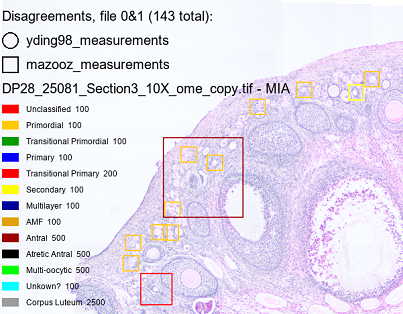

There is also a file showing where they agree on the location but disagree on the follicle type
`<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_type.png`.

In addtion, there are two text files listing summary counts by follicle type 
for each annotation and a table showing how annotations tend to shift through the list of follicle types 
for the two annotators. For more infoamation  on the outptu files, see the **[Output Files](#Output-Files)** 
section in this notebook .

### To Run
Scroll down to, or click on this **[Enter Needed Info](#Enter-Needed-Info)** section and fill in the needed paths and the scaling factor.

### TO DO:
1. In the code and file names I use annotator "0" and "1", in the text I use "1" and "2". :}
1. **The "agreements" output does not take into account the types not matching, they "agreee" only in having an annotation at the same place.**
1. Change fro the text annotations table to the GeoJSON table. That would allow shwoing the polyline annotations as lines instead of as points.

Originally developed with test files from:
https://www.dropbox.com/home/QuPATH_follicleCounting/


## [Enter Needed Info](#Enter-Needed-Info)
### 1. Paths to the two annotators' QuPath projects

Below, enter the full path to each ot the annotors annotations files. These files are exported manually from QuPath using menu "Measure" "Show annotation measurments" then clicking on the "Save" button. The file format is given in the text below. The measurement file should be named `<username>_measurements.txt` where `<username>` is the annotator's user name.

Note 1: Proceed the file name strings with "r" to keep python from interpreting the backslash (/) character in Windows file paths. <br>
Note 2: This may be accessing files via DropBox so DropBox must be running.<br>
Note 3: The starting "consensus" annotation QuPath project will be made from Annotator #1's files.

<div class="alert alert-block alert-info">
<b>TO DO:</b>  Edit the definitions of 'fname1' and 'fname2' to include the full path to the two annotators' measurements files. <br>
For example;<br>
&nbsp &nbsp &nbsp fname1 = 'C:\Users\jsluk\Dropbox\QuPATH_follicleCounting\25081_follicleCounting_yding98\yding98_measurements.txt'
</div>

In [1]:
#fname1 = \
#   r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\JupyterNotebookVersion\25081_follicleCounting_yding98\yding98_measurements.txt"
#fname2 = \
#   r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\JupyterNotebookVersion\25081_follicleCounting_ mazooz\mazooz_measurements.txt"

fname1 = \
   r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001b_avdaniel_annotations.txt"
fname2 = \
   r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001_kdausti3_annotations.txt"

### 2. Image path: the image used to create the overlays

This points to the original, full resolution image. <br>
This path could perhaps be extracted from one of the two annotators' QuPath files.<br>

<div class="alert alert-block alert-info">
<b>TO DO:</b>  Edit the definition of "imagePath" to contain the full path to the original image file.<br>
For example;<br>
&nbsp &nbsp &nbsp imagePath = r'C:\Users\jsluk\Dropbox\QuPATH_follicleCounting\DP28_25081_Section3_10X_ome_copy.tif'
</div>

In [2]:
#imagePath =  \
#  r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\JupyterNotebookVersion\DP28_25081_Section3_10X_ome.tif"
imagePath =  \
  r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\KY_PS_LD40628_001b.ome.tif"

### 3. Image pixel resolution

Differing microscopes and workflows generate images with different pixel sizes. For example;

 - Pixel width = Pixel height = 0.1725 um
 - Pixel width = Pixel height = 0.2251 um

The value belows it the width of one image pixel in micrometers (um). The image pixel rsolution is availble in QuPath in the meta data for an image. Three common pixel resolutions are shown above, 
but you may encounter others.

**NOTE: If the annotations shown on the output images appear to be in the worng place, or if you get a message about trying to draw on the image but the coordinates are out of range for the image, then this pixel resolution is the likely problem.**

<div class="alert alert-block alert-info">
<b>TO DO:</b>  Edit the resolution parameter below to match your image's resolution. You can either comment/uncoment to get one 
    that is already listed or add a new one.<br>
For example;<br>
&nbsp &nbsp &nbsp imgPixEqualsMicrometers = 0.495<br>
</div>

In [3]:
#imgPixEqualsMicrometers = 0.1725   # 
#imgPixEqualsMicrometers = 0.2251   # some mouse slides
imgPixEqualsMicrometers = 0.6900    # most of the non-human primates slides

### 4. Output path

This is directory where the various outputs will be written. This path should have the same upper level path as the main project so that the animal and slice are identified. Replace the annotator's name with "_consensus'.

Annotator \#1's files are copied to this directory and are the starting "\_concensus" results. Comparison results are also written to this directory.

**NOTE: Since this is a path and not a file name you will need to end with \\\\", that is a bouble backslash then a quote to match the starting quote charachter**

For example, 

`"C:\Users\jsluk\Dropbox\QuPATH_follicleCounting\25081_follicleCounting_<annotator 1>_<annotator 2>_concensus\\" `


<div class="alert alert-block alert-info">
<b>TO DO:</b>  Edit the definition of `path` to contain the full path to the desired output directory.<br>
For example;<br>
&nbsp &nbsp &nbsp path = r'C:\Users\jsluk\Dropbox\QuPATH_follicleCounting\25081_follicleCounting_yding98_mazooz_concensus\\'<br>
&nbsp &nbsp &nbsp Note both annotators names (yding98 and mazooz in this example) and "_concensus".
</div>

In [4]:
path = \
  r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\JupyterNotebookVersion\25081_follicleCounting_yding98_mazooz_concensus\\"
path = \
  r"C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\"

### 4. Platform: Windows, Mac, Linux

Fonts have different names on different platforms. In particular the name of the main font used here is different 
on Windows ('arial') and Mac's ('Arial'). If you get an error like;

`title_font = ImageFont.truetype('Arial', fontSize)`<br>
`OSError: cannot open resource` <br>
or<br>
`title_font = ImageFont.truetype(fontFaceName, fontSize)`<br>

Then the font is not being found, likely because of the Arial vs arial issue.
The code below sets the proper font name for each platform.

In [5]:
import platform
# platform.system() returns Windows, Linux or Darwin (last one is Mac)
if platform.system() == 'Darwin':  # Mac
    fontFaceName = 'Arial'
elif platform.system() == 'Windows':
    fontFaceName = 'arial'
elif platform.system() == 'Linux':
    fontFaceName = 'arial'    # not sure if this is the write case on Linux
else:
    print("\t\tCould not determine operating system, platform.system() returns", platform.system() )
    fontFaceName = 'arial'    # not sure if this is the right case on Linux
    
print('platform.system()=',platform.system(),'     fontFaceName=', fontFaceName)

platform.system()= Windows      fontFaceName= arial


## Ready to run
### Imports

In [6]:
# Imports
from pprint import pprint
import os
import shutil
import math
import inspect

#### you can upgrade pillow with      !pip install pillow  or     !pip install --upgrade pillow 
### JPS's laptop gives a PIL version of 9.0.1

from PIL import Image, ImageDraw, ImageFont
Image.MAX_IMAGE_PIXELS = 750000000  # our images tend to be hundreds of MB in size, use 750MB to avoid the 'DecompressionBombWarning'
#import PIL
#print('PIL:',PIL.__version__)

from IPython.display import display, HTML  # to display images inside Jupyter (img.show() doesn't work)
display(HTML("<style>.container { width:100% !important; }</style>"))

### Do some simple checks

In [7]:
print("Checking the file names, paths, etc.")
print("fname1:\n  ",fname1,"\nfname2:\n  ",fname2)
fname1fname = os.path.basename(fname1)
fname2fname = os.path.basename(fname2)
#(a1,b1) = fname1fname.split(".")  # pre 2/12/24
#(a2,b2) = fname2fname.split(".")  # pre 2/12/24
# the below handles cases where the filename has more than one extension
(a1,b1) = os.path.splitext(fname1fname)
(a2,b2) = os.path.splitext(fname2fname)
#print(a1,"   ",b1,"   ",a2,"   ",b2,"\n\n")

# make sure the annotation files actually exist
for af in (fname1,fname2):
    if os.path.exists(af):
        print('Annotation file found:',af)
    else:
        print('\n\nProblem with the imagePath:\n',af,"\nThis must be fixed.\nexiting.")
        exit(1)  # no need to keep running if the file can't be found
        
# make sure the image file exists
print('\nPath to the original, full resolution image:\n  ',imagePath)
if os.path.exists(imagePath):
    print('Image file found.')
else:
    print('Problem with the imagePath:\n',imagePath,"\n\nThis must be fixed.\nexiting.")
    exit(1)  # no need to keep running if the image can't be found
    
# check that the output path is OK
if not os.path.exists(path):
    os.mkdir(path)
    print("\nOutput folder created.")
else:
    print("\nOutput folder already exists. That should be OK.")

Checking the file names, paths, etc.
fname1:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001b_avdaniel_annotations.txt 
fname2:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001_kdausti3_annotations.txt
Annotation file found: C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001b_avdaniel_annotations.txt
Annotation file found: C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001_kdausti3_annotations.txt

Path to the original, full resolution image:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnota

## Copy the two annotators' measurement files to the output directory

In [8]:
shutil.copy(fname1, os.path.join(path,fname1fname))
shutil.copy(fname2, os.path.join(path,fname2fname))

'C:\\Users\\jsluka\\OneDrive - Indiana University\\Desktop\\Work\\Watanabe ovary 2021\\MOTHER\\Segmentation tools\\ComparingTwoAnnotators\\Bug 2024_02_09\\AnotA_AnotB_concensus\\\\LD40628_001_kdausti3_annotations.txt'

## Copy the first annotator's entire QuPath project to the output directory

Normally this program creates a new folder with all the QuPath files from annotator \#1. This is not strictly required, and as long as the annotations files and image file paths are OK this code should work. In any case, the output is in the **Output path** defined in step 4. If there is no QuPath project info in annotator 1's directory, then it will not be included in the output folder. 

In [9]:
# Could just copy the entire directory, but that will give the measurements and other files as well,
# so copy files and folders explictly.
# It is possible that files from previous runs of this code already exist.

                 ################################### put back in?
A1path = os.path.split(fname1)[0] # annotators one path
print("Copying annotator 1's QuPath project:\n ",A1path)
print("to the output dir:\n ",path,"\n")

# files
for aname in ('project.qpproj', 'project.qpproj.backup'):
    src=os.path.normpath(os.path.join(A1path,aname))
    dst=os.path.normpath(os.path.join(path,aname))
    if os.path.exists(src):
        #print('src: ',src,'\ndst: ',dst,'\n')
        if not os.path.exists(dst):
            shutil.copy2(src,dst)
    else:
        print('No QuPath ',aname,'" found, that should be OK.',sep='')
    
# directories
for aname in ('classifiers', 'data', 'scripts'):
    src=os.path.normpath(os.path.join(A1path,aname))
    dst=os.path.normpath(os.path.join(path,aname))
    #print('src: ',src,'\ndst: ',dst,'\n')
    if os.path.exists(src):
        if not os.path.exists(dst):
            shutil.copytree(src,dst)
    else:
        print('No QuPath folder "', aname, '" found, that should be OK.',sep='')
        
print('\nDone')

Copying annotator 1's QuPath project:
  C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09
to the output dir:
  C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\ 

No QuPath project.qpproj" found, that should be OK.
No QuPath project.qpproj.backup" found, that should be OK.
No QuPath folder "classifiers" found, that should be OK.
No QuPath folder "data" found, that should be OK.
No QuPath folder "scripts" found, that should be OK.

Done


## Data Structures
The dictionary contains the MOTHER speific annotation classes, sizes and colors.

In [10]:
'''
'follicleInfo' has information on the various follicle types.
'width' is the typical width of the follicle of that type (in pixels).
'color' is the annotation color used in the QuPath macro

The named colors in the Python Image Library are listed at
https://stackoverflow.com/questions/54165439/what-are-the-exact-color-names-available-in-pils-imagedraw

10 Oct 2022: "Unclassified" changed from red (which is the asme as for "Transitional Primary") to LavenderBlush
17 Nov 2023: Upaded the list to include the new types that the QuPath MOTHER uses: 
                     "Blood Vessel", "Cortex Outer Border", and "Cortex Inner Border"
                     
'''

###### NEW version Nov. 17, 0223
follicleInfo = {"Unclassified":           {"width": 100, "color":"lavenderblush" },
                "Primordial":             {"width": 100, "color":"orange"        },
                "Transitional Primordial":{"width": 100, "color":"green"         },
                "Primary":                {"width": 100, "color":"blue"          },
                "Transitional Primary":   {"width": 200, "color":"red"           },
                "Secondary":              {"width": 100, "color":"yellow"        },
                "Multilayer":             {"width": 100, "color":"navy"          },
                "AMF":                    {"width": 100, "color":"darkgoldenrod" },
                "Antral":                 {"width": 500, "color":"maroon"        },
                "Atretic Antral":         {"width": 500, "color":"black"         },
                "Multi-oocytic":          {"width": 500, "color":"lime"          },
                "Unkown?":                {"width": 100, "color":"cyan"          },
                "Corpus Luteum":          {"width":1000, "color":"gray"          },
                 
                "Blood Vessel":           {"width": 100, "color":"whitesmoke"    },
                "Cortex Outer Border":    {"width":2000, "color":"crimson"       },
                "Cortex Inner Border":    {"width":2000, "color":"royalblue"     },                 
                 
                 "PIE":                    {"width": 100, "color":"black"        },
                }

print('follicleInfo:')
pprint(follicleInfo)

# exmaples of how to access info in 'follicleInfo'
print("\nPrimordial width and color:",follicleInfo["Primordial"]["width"],'and',follicleInfo["Primordial"]["color"])

follicleInfo:
{'AMF': {'color': 'darkgoldenrod', 'width': 100},
 'Antral': {'color': 'maroon', 'width': 500},
 'Atretic Antral': {'color': 'black', 'width': 500},
 'Blood Vessel': {'color': 'whitesmoke', 'width': 100},
 'Corpus Luteum': {'color': 'gray', 'width': 1000},
 'Cortex Inner Border': {'color': 'royalblue', 'width': 2000},
 'Cortex Outer Border': {'color': 'crimson', 'width': 2000},
 'Multi-oocytic': {'color': 'lime', 'width': 500},
 'Multilayer': {'color': 'navy', 'width': 100},
 'PIE': {'color': 'black', 'width': 100},
 'Primary': {'color': 'blue', 'width': 100},
 'Primordial': {'color': 'orange', 'width': 100},
 'Secondary': {'color': 'yellow', 'width': 100},
 'Transitional Primary': {'color': 'red', 'width': 200},
 'Transitional Primordial': {'color': 'green', 'width': 100},
 'Unclassified': {'color': 'lavenderblush', 'width': 100},
 'Unkown?': {'color': 'cyan', 'width': 100}}

Primordial width and color: 100 and orange


## Extract the information in the annotation summary files

NOTE: If the annotation file contains any annotations other than what is in the `follicleInfo` list then a message is given listing the unrecognizxed annotation type. For exmple:
<pre>
Skipping annotation type (not in 'follicleInfo'): 'PathAnnotationObject'
</pre>
Often, these annotaions are  not a points or polyline annotation. In the above the unrecognized type is 'PathAnnotationObject'. <br>
**This program ignores these annotations.**

In [11]:
########################### this is the main data structure ###################################
dat = []  # list of dictionaries, 
lastImageFileName = ""
user = -1

for fname in (fname1,fname2):
    user += 1 # the first user is "0"
    print("\n\n*********** next file: user count=",user,"\nfile name=\n  ", fname)
    f = open(fname,'r')
    ann = f.read()
    f.close()
    #print("file contents:\n",ann)  # print the file for debugging
    lines = ann.splitlines()
    
    ############ 
    # Decide if this annotations file is QuPath version 4.4 or version 5.x
    headers = lines[0].split("\t")
    #print(lines[0],'\n',headers[2],'\n',headers[2],'\n')
    if headers[2] == "Class":
        colOffset = 0
        print('>>>>>>>>>>>>>>>>>> Looks like a QuPath 4.x file.')
    elif headers[4] == "Classification":
        colOffset = 2
        print('>>>>>>>>>>>>>>>>>> Looks like a QuPath 5.x file.')
    else:
        print(lines[0],'\n',headers[2],'\n',headers[4],'\n')
        print("\nCan't figure out if this is a QuPath 4.4 or 5.x file!\nAborting *******************************************.")
        print("(the divide by zero is just to force Jupyter notebook to stop and not continue on to other cells in the notebook.)")
        print(1/0)

    dat.append({})  # list of dictionaries
    collectedAnns = []
    lastImageFileName = ""
    for aline in lines[1:]:  # skip the first line since it is the header, use lines[1:5] for debugging, lines[1:] otherwise
        #print("\taline: ",aline)
        afields = aline.split("\t")
        if len(afields) >= 2 and afields[2+colOffset] in follicleInfo:  # must be a recognized annotation, includes "PIE"
            if afields[2+colOffset] != 'PIE':
                if afields[0] != lastImageFileName:
                    if lastImageFileName != "":
                        #print("*************** New set, saving last round of annotations")
                        dat[user][lastImageFileName]['anns'] = collectedAnns
                    lastImageFileName = afields[0]
                    collectedAnns = []
                    dat[user][lastImageFileName] = {}
                else:
                    #print("*************** same name")
                    pass
                collectedAnns.append( {'ftype':afields[2+colOffset], 'atype':afields[4+colOffset], 'xcom':float(afields[5+colOffset]), 'ycom':float(afields[6+colOffset]), 'found':0} )
                #print('\tcheck:',collectedAnns[-1])
        else:
             if afields[1] not in follicleInfo:
                print("\t\tSkipping annotation type (not in 'follicleInfo'): '",afields[1+colOffset],"'",sep="")
                print(afields)

    #print("*************** saving final set of annotations for this input file")
    dat[user][lastImageFileName]['anns'] = collectedAnns


#print("\n*************** dat:")
#pprint(dat)
print("\n\nFinished loading the two files of annotations.")

# Examples of how to access the various things
sampleSet = list(dat[0].keys())[0]  # a key name for the demo's below, from the first annotation file   

print("\n\nExamples of how to access various items in the 'dat' data structure:\n")
print("dat[0]['",sampleSet,"']['anns'][2]['xcom'] = ", \
      dat[0][sampleSet]['anns'][2]['xcom'], sep="")
print("dat[1]['",sampleSet,"']['anns'][4]['xcom'] = ", \
      dat[1][sampleSet]['anns'][4]['xcom'], sep="")
print("dat[0]['",sampleSet,"']['anns'][2]] = \n     ", \
      dat[0][sampleSet]['anns'][2], sep="")
print("dat[1]['",sampleSet,"']['anns'][4] = \n     ", \
      dat[1][sampleSet]['anns'][4], sep="")
print("dat[0]['",sampleSet,"']['anns'][:5] = ", sep="")
pprint(dat[0][sampleSet]['anns'][:3])



*********** next file: user count= 0 
file name=
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001b_avdaniel_annotations.txt
>>>>>>>>>>>>>>>>>> Looks like a QuPath 5.x file.


*********** next file: user count= 1 
file name=
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\LD40628_001_kdausti3_annotations.txt
>>>>>>>>>>>>>>>>>> Looks like a QuPath 4.x file.


Finished loading the two files of annotations.


Examples of how to access various items in the 'dat' data structure:

dat[0]['KY_PS_LD40628_001b.ome.tif - MIA']['anns'][2]['xcom'] = 946.09
dat[1]['KY_PS_LD40628_001b.ome.tif - MIA']['anns'][4]['xcom'] = 949.58
dat[0]['KY_PS_LD40628_001b.ome.tif - MIA']['anns'][2]] = 
     {'ftype': 'Multilayer', 'atype': 'Points', 'xcom': 946.09, 'ycom': 1618.3, 'found': 0}
dat[1]['KY_PS_LD4062

## Look for matches between the two sets of annotations
Iterate over users, annotation files and annotions that are all stored in "dat"

Iterating over user1 and looking in user2

In [12]:
foundMatchCount = 0
foundText = ""
notFoundText = ""

for imageName1 in dat[0]:
    if imageName1 != "userid":
        print("\nImage name key:",imageName1)
        for i in range(len(dat[0][imageName1]['anns'])):
            atype1=dat[0][imageName1]['anns'][i]['atype']
            ftype1=dat[0][imageName1]['anns'][i]['ftype']
            xcom1 =dat[0][imageName1]['anns'][i]['xcom']
            ycom1 =dat[0][imageName1]['anns'][i]['ycom']
            #print("\ti,atype1,ftype1,xcom1,ycom1:",i,atype1,ftype1,xcom1,ycom1)
            threshold = follicleInfo[ftype1]['width']
            #print("\t\tUsing threshold for ftype1, Threshold:",ftype1,threshold)  ###
                    
            # iterate over all of the same images in the second data set
            bestatype = ""; bestftype = ""; bestxcom=""; bestycom=""; bestID2=-1; bestDistance = 1.e100
            if imageName1 in dat[1]:
                for i2 in range(len(dat[1][imageName1]['anns'])):
                    atype2=dat[1][imageName1]['anns'][i2]['atype']
                    ftype2=dat[1][imageName1]['anns'][i2]['ftype']
                    xcom2 =dat[1][imageName1]['anns'][i2]['xcom']
                    ycom2 =dat[1][imageName1]['anns'][i2]['ycom']
                    if ftype2 != 'PIE':
                        d = math.sqrt((xcom1-xcom2)**2 + (ycom1-ycom2)**2)
                        if d < bestDistance:
                            bestatype=atype2; bestftype=ftype2; bestxcom=xcom2; bestycom=ycom2; bestDistance=d; bestID2=i2
                if bestDistance < threshold:
                    foundMatchCount += 1
                    #print("Found close match, d=",f"{bestDistance:4.1f}"," imageName1=",imageName1)
                    #print("\tset  atype  ftype  xcom  ycom  ")
                    #print("\t1 ",atype1,ftype1,xcom1,ycom1)
                    #print("\t2 ",atype2,ftype2,bestxcom,bestycom)
                    dat[0][imageName1]['anns'][i]['found'] += 1
                    dat[1][imageName1]['anns'][bestID2]['found'] += 1
                    foundText += imageName1+"\t"+f"{bestDistance:.1f}"+"\t"+str(threshold)  \
                                 +"\t"+atype1+"\t'"+ftype1+"'\t"+str(xcom1)+"\t"+str(ycom1) \
                                 +"\t"+str(dat[0][imageName1]['anns'][i]['found'])          \
                                 +"\t"+bestatype+"\t'"+bestftype+"'\t"+str(bestxcom)+"\t"+str(bestycom) \
                                 +"\t"+str(dat[1][imageName1]['anns'][bestID2]['found'])+"\n"
                    #print(foundText)
                else:
                    #print("\t\tdid not find a good match")
                    #print("\t\t\tbestDistance=",bestDistance)
                    #print("\t\t\t1 ",atype2,ftype2,xcom2,ycom2)
                    notFoundText += imageName1+"\t"+f"{bestDistance:.1f}"+"\t"+str(threshold) \
                                              +"\t"+atype1+"\t'"+ftype1+"'\t"+str(xcom1)+"\t"+str(ycom1) \
                                              +"\t"+atype2+"\t'"+ftype2+"'\t"+str(bestxcom)+"\t"+str(bestycom)+ "\n"
            else:
                print("---- Imagename1 not found in data set 2:",imageName1)

print("\nFor image1 looking into image2:")
# below needs to take into account possible multiple image file names
print("\timage1 has",len(dat[0][imageName1]['anns'])," annotations")
print("\timage2 has",len(dat[1][imageName1]['anns'])," annotations")

print("Found matches for",foundMatchCount)
#print("foundText:\n",foundText,sep="")  # print a list of all the matches, this is also written to a file

print("Not found count:",len(notFoundText.splitlines()))
#print("notFoundText:\n",notFoundText,sep="")  # print a list of all the not founds, this is also written to a file


# save results
outFileNameMatches = path + a1+"__"+a2+"__matches.tsv"
print("\nWriting matches file:\n  ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(foundText);  f.close()

outFileNameMatches = path + a1+"__"+a2+"__nonmatches_nearest.tsv"
print("Writing non-matches file:\n  ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(notFoundText);  f.close()

print('\nDone')


Image name key: KY_PS_LD40628_001b.ome.tif - MIA

For image1 looking into image2:
	image1 has 14  annotations
	image2 has 11  annotations
Found matches for 11
Not found count: 3

Writing matches file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations__matches.tsv
Writing non-matches file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations__nonmatches_nearest.tsv

Done


## Find Disagreements 
Scan the 'dat' structure looking for annotations that occured in one data set but not the other data set.

This data is in notFoundText but only for the first annotator

`dat[0]['DP28_25081_Section3_10X_ome_copy.tif - MIA']['anns'][2]['found'])`

In [13]:
#### Find Disagreements #######################################################################
# Scan the 'dat' structure looking for annotations that never occured.
# this data is in notFoundText but only for the first annotator
# dat[0]['DP28_25081_Section3_10X_ome_copy.tif - MIA']['anns'][2]['found'])
print("\nLooking for non-matches ...")
notFoundTextN=["", ""]
notFoundCountN=[0, 0]
for k1 in (0,1):  #k1 is the user ID (0 or 1)
    print('k1 =',k1)
    for fnm in dat[k1]:
        for id in dat[k1][fnm]['anns']:
            if id['found'] == 0:
                notFoundTextN[k1] += fnm+"\t'"+id['ftype']+"'\t"+id['atype']+"\t"+str(id['xcom'])+"\t"+str(id['ycom'])+"\t"+str(id['found'])+"\n"
                notFoundCountN[k1] += 1
print("notFoundCountN[0] =",notFoundCountN[0])
#print("notFoundTextN[0]=\n",notFoundTextN[0],sep='')
print("notFoundCountN[1] =",notFoundCountN[1])
#print("notFoundTextN[1]=\n",notFoundTextN[1],sep='')
outFileNameMatches = path + a1+"__0_nonmatches.tsv"
print("Writing non-matches file:\n  ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(notFoundTextN[0]);  f.close()
outFileNameMatches = path + a2+"__1_nonmatches.tsv"
print("Writing non-matches file:\n  ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(notFoundTextN[1]);  f.close()
print("\nDone.")


Looking for non-matches ...
k1 = 0
k1 = 1
notFoundCountN[0] = 3
notFoundCountN[1] = 1
Writing non-matches file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__0_nonmatches.tsv
Writing non-matches file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001_kdausti3_annotations__1_nonmatches.tsv

Done.


## Create the output images

### Fix the image scaling

Problem with the coordinates in the annotations not aligning with the coordinates in the image. The image uses units of pixles but the measurements (annotations) are converted to micrometers by QuPath. `sc` is the scaling factor.

The QuPath project file (*.qpproj) has;<br>
` "pixelCalibration": {`<br>
`           "pixelWidth": {`<br>
`                "value": 0.17250000000000001, `<br>
`                "unit": "µm" `<br>
`           }, `<br>
`           "pixelHeight": { `<br>
`                "value": 0.17250000000000001, `<br>
`                "unit": "µm" `<br>
`           }, `

We use sc = 1/pixelCalibration

The orignal annotation project used a pixel size of 0.1725. The newer annotation projects use a
value of 0.69um/pixel. This is listed in the QuPath *.qpproj file.

#### Nov. 22, 2023
Getting more images with differing pixel sizes. Added a dialog box up above to get the Pixel size from the user while the filenames
are being entered. Below we use that pixel size "imgPixEqualsMicrometers" to defince "sc". 

In [14]:
#sc = 1/0.172500   # = 5.7971  scale factor for locating the circles, the newer annotations use 0.69 instead of 0.1725
#sc = 1/0.2251    # t= 4.421 for the mouse files 11/22/2023 use 0.2251 
sc = 1/imgPixEqualsMicrometers

### Base radius for how big the annotations circles will be drawn and the default rescaling
`w` is the radius of the circle used to highligh the annotations in the various comparison images.

`resize_scale` is a rescaling factor for these comparison images. Since the orignal images are in the 50MB to 250MB range we don't want these images used for comparison purposes only to be nearly as big. An `resize_scale` of 0.2 reduces the size of the file by about 0.2^2 = 4% of the original image size.

In [15]:
w = 60  # base radius of circle, will be modified by the scale factor for the various follicle types
resize_scale = 0.20 # scale the image down by this much before saving

### Agreements figure (location only)
Create a figure showing where the annotations agree in location only. The two annotations may not be of the same type.

In [16]:
#import inspect
#from PIL import Image, ImageDraw, ImageFont
#Image.MAX_IMAGE_PIXELS = 500000000  # 0.5GB  to avoid the DecompressionBombWarning

#### Agreements figure ##########################################################
# image file name at top of this file
#outPath = imagePath+"_comparison_agreements.png"
outPath = path+a1+"__"+a2+"_comparison_agreements_location.png"
print("in path: \n  ",imagePath)
print("Out path:\n  ",outPath)

print("\nImages, agreements...")
im = Image.open(imagePath)
print("Image info:",im)
draw = ImageDraw.Draw(im)

print("Circle list for matching annotations: scale, circle width:",sc,w)
for aline in foundText.splitlines():
    #print("aline:",aline)
    (f,d,t,t1,p1,x1,y1,count1,t2,p2,x2,y2,count2) = aline.split("\t")
    x1=int(sc*float(x1)+0.5);  y1=int(sc*float(y1)+0.5);  x2=int(sc*float(x2)+0.5);  y2=int(sc*float(y2)+0.5);  
    #print("\tx1,y1,  x2,y2: %6i %6i   %6i %6i  %s  %s" % (x1,y1,x2,y2,p1,p2))
    theColor1 = follicleInfo[p1[1:-1]]["color"]  # note that p1 has explicit single quotes
    theColor2 = follicleInfo[p2[1:-1]]["color"]
    wLocal1 = int(w*follicleInfo[p1[1:-1]]["width"]/100.+0.5)  # note that p1 has explicit single quotes
    wLocal2 = int(w*follicleInfo[p2[1:-1]]["width"]/100.+0.5)
    draw.ellipse(  (x1-wLocal1,y1-wLocal1, x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)  fill="white"
    draw.rectangle((x2-wLocal2,y2-wLocal2, x2+wLocal2,y2+wLocal2), outline=theColor2, width=8)  #(x1, y1, x2, y2)

# rescale the image to save space
print("resizing by",resize_scale)
im2=im.resize((int(im.width*resize_scale + 0.5),int(im.height*resize_scale + 0.5)))
draw2 = ImageDraw.Draw(im2)

# add a title
fontSize=int(100*resize_scale+0.5)
title_font = ImageFont.truetype(fontFaceName, fontSize)
edge_size = int(max(2,8*resize_scale)+0.5)

tx=int(1*w*resize_scale);   ty=int(1*w*resize_scale);
draw2.text((tx,ty), 'Agreements (location only, type not considered)' + ' (' + str(foundMatchCount) + ' total):', fill=(0,0,0), font=title_font)

tx=int(4*w*resize_scale);   ty=int(4*w*resize_scale);
#draw2.text((tx,ty), fname1s, fill=(0,0,0), font=title_font)
draw2.text((tx,ty), a1, fill=(0,0,0), font=title_font)
sx1=int(1*w*resize_scale);   sy1=int(4*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(6*w*resize_scale);
draw2.ellipse((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

tx=int(4*w*resize_scale);   ty=int(7*w*resize_scale); 
#draw2.text((tx,ty), fname2s, fill=(0,0,0), font=title_font)
draw2.text((tx,ty), a2, fill=(0,0,0), font=title_font)
sx1=int(1*w*resize_scale);   sy1=int(7*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(9*w*resize_scale); 
draw2.rectangle((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

tx=int(1*w*resize_scale);   ty=int(10*w*resize_scale); 
draw2.text((tx,ty), imageName1, fill=(0,0,0), font=title_font)

# add a key
fontSize2=int(60*resize_scale+0.5)
title_font2 = ImageFont.truetype(fontFaceName, fontSize2)
i=0
for ft in follicleInfo:
    if ft != 'PIE':
        i+=1
        #print('ft:',ft)
        txt=ft + "  " + str(follicleInfo[ft]['width'])
        tx=int(4*w*resize_scale);   ty=int((11*w + i*2*w)*resize_scale); 
        draw2.text((tx,ty), txt, fill=(0,0,0), font=title_font2)
        tc =str(follicleInfo[ft]['color'])
        sx1=int(1*w*resize_scale);   sy1=ty;  sx2=int(3*w*resize_scale);  sy2=ty+0.2*w; 
        draw2.rectangle((sx1,sy1,sx2,sy2), outline=tc, fill=tc, width=edge_size)


# save the image
print("Saving file:\n  ",outPath)
im2.save(outPath)
print("\nAgreements figure done.")

#display.display(im2)

in path: 
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\KY_PS_LD40628_001b.ome.tif
Out path:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_agreements_location.png

Images, agreements...
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278FA9450>
Circle list for matching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_agreements_location.png

Agreements figure done.


### Disagreement in type, but have same centroid coordinates

In [17]:
#### Disagreement in type, but have same centroid coordinates ###########################################################
#outPath = imagePath+"_comparison_disagreements_type.png"
outPath = path+a1+"__"+a2+"_comparison_disagreements_type.png"
print("in and out paths:\n    ",imagePath,"\n    ",outPath)

print("\nImages, disagreements in type...")
im = Image.open(imagePath)
print("Image info:",im)
draw = ImageDraw.Draw(im)

print("Circle list for unmatching annotations: scale, circle width:",sc,w)
mismatchCount = 0
for aline in foundText.splitlines():
    #print("aline:",aline)
    (f,d,t,t1,p1,x1,y1,count1,t2,p2,x2,y2,count2) = aline.split("\t")
    x1=int(sc*float(x1)+0.5);  y1=int(sc*float(y1)+0.5);  x2=int(sc*float(x2)+0.5);  y2=int(sc*float(y2)+0.5);  
    #print("\tx1,y1,  x2,y2: %6i %6i   %6i %6i  %s  %s" % (x1,y1,x2,y2,p1,p2))
    if p1 != p2:  # only showing when the follicle types are not the same
        mismatchCount += 1
        theColor1 = follicleInfo[p1[1:-1]]["color"]  # note that p1 has explicit single quotes
        theColor2 = follicleInfo[p2[1:-1]]["color"]
        wLocal1 = int(w*follicleInfo[p1[1:-1]]["width"]/100.+0.5)  # note that p1 has explicit single quotes
        wLocal2 = int(w*follicleInfo[p2[1:-1]]["width"]/100.+0.5)
        draw.ellipse(  (x1-wLocal1,y1-wLocal1, x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)  fill="white"
        draw.rectangle((x2-wLocal2,y2-wLocal2, x2+wLocal2,y2+wLocal2), outline=theColor2, width=8)  #(x1, y1, x2, y2)

# rescale the image to save space
print("resizing by",resize_scale)
im2=im.resize((int(im.width*resize_scale + 0.5),int(im.height*resize_scale + 0.5)))
draw2 = ImageDraw.Draw(im2)

# add a title
fontSize=int(100*resize_scale+0.5)
title_font = ImageFont.truetype(fontFaceName, fontSize)
edge_size = int(max(2,8*resize_scale)+0.5)

tx=int(1*w*resize_scale);   ty=int(1*w*resize_scale);
draw2.text((tx,ty), 'Follicle type disagreements' + ' (' + str(mismatchCount) + ' total):', fill=(0,0,0), font=title_font)

tx=int(4*w*resize_scale);   ty=int(4*w*resize_scale);
draw2.text((tx,ty), a1, fill=(0,0,0), font=title_font)
sx1=int(1*w*resize_scale);   sy1=int(4*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(6*w*resize_scale);
draw2.ellipse((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

tx=int(4*w*resize_scale);   ty=int(7*w*resize_scale); 
draw2.text((tx,ty), a2, fill=(0,0,0), font=title_font)
sx1=int(1*w*resize_scale);   sy1=int(7*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(9*w*resize_scale); 
draw2.rectangle((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

tx=int(1*w*resize_scale);   ty=int(10*w*resize_scale); 
draw2.text((tx,ty), imageName1, fill=(0,0,0), font=title_font)

# add a key
fontSize2=int(60*resize_scale+0.5)
title_font2 = ImageFont.truetype(fontFaceName, fontSize2)
i=0
for ft in follicleInfo:
    if ft != 'PIE':
        i+=1
        #print('ft:',ft)
        txt=ft + "  " + str(follicleInfo[ft]['width'])
        tx=int(4*w*resize_scale);   ty=int((11*w + i*2*w)*resize_scale); 
        draw2.text((tx,ty), txt, fill=(0,0,0), font=title_font2)
        tc =str(follicleInfo[ft]['color'])
        sx1=int(1*w*resize_scale);   sy1=ty;  sx2=int(3*w*resize_scale);  sy2=ty+0.2*w; 
        draw2.rectangle((sx1,sy1,sx2,sy2), outline=tc, fill=tc, width=edge_size)


# save the image
print("Saving file:\n  ",outPath)
im2.save(outPath)
print("\nDisagreement in type done.")

in and out paths:
     C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\KY_PS_LD40628_001b.ome.tif 
     C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_disagreements_type.png

Images, disagreements in type...
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278F56CB0>
Circle list for unmatching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_disagreements_type.png

Disagreement in type

### Disagreements Plots 1 & 2, seperate image for each

In [18]:
#### Disagreements Plots 1 & 2, seperate image for each ###########################################################
print("\nImages, disagreements x2 plots ...")
for iii in (0,1): # the two files
    #outPath = imagePath+"_comparison_disagreements_"+str(iii)+".png"
    outPath = path+a1+"__"+a2+"_comparison_disagreements_"+str(iii)+".png"

    im = Image.open(imagePath)
    print("Image info:",im)
    draw = ImageDraw.Draw(im)

    print("Circle list for non-matching annotations: scale, circle width:",sc,w)
    for aline in notFoundTextN[iii].splitlines():
        #DP28_25081_Section3_10X_ome_copy.tif - MIA	'Primordial'	Points	963.51	1651.9	0
        #print("aline:",aline)
        (f,ft,at,x,y,count) = aline.split("\t")
        x1=int(sc*float(x)+0.5);  y1=int(sc*float(y)+0.5);  x2=int(sc*float(x)+0.5);  y2=int(sc*float(y)+0.5);  
        #print("\tx1,y1,  x2,y2: %6i %6i   %6i %6i  %s  %s" % (x1,y1,x2,y2,ft,at))
        theColor1 = follicleInfo[ft[1:-1]]["color"]  # note that p1 has explicit single quotes
        wLocal1 = int(w*follicleInfo[ft[1:-1]]["width"]/100.+0.5)  # note that p1 has explicit single quotes
        #draw.ellipse(  (x1-wLocal1,y1-wLocal1,x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)  fill="white"
        if iii == 0:
            # circle
            draw.ellipse((x1-wLocal1,y1-wLocal1,x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)  fill="white"
        else:
            # square
            draw.rectangle((x1-wLocal1,y1-wLocal1,x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)


    # rescale the image to save space
    print("resizing by",resize_scale)
    im2=im.resize((int(im.width*resize_scale + 0.5),int(im.height*resize_scale + 0.5)))
    draw2 = ImageDraw.Draw(im2)

    # add a title and key
    fontSize=int(100*resize_scale+0.5)
    title_font = ImageFont.truetype(fontFaceName, fontSize)
    edge_size = int(max(2,8*resize_scale)+0.5)

    line1 = 'Disagreements, file '+ str(iii) + ' (' + str(notFoundCountN[iii]) + ' total):'
    tx=int(2*w*resize_scale);   ty=int(1*w*resize_scale);
    draw2.text((tx,ty), line1, fill=(0,0,0), font=title_font)

    if iii == 0:
        line2 = a1  #fname1s
    else:
        line2 = a2  #fname2s
    tx=int(5*w*resize_scale);   ty=int(4*w*resize_scale);
    draw2.text((tx,ty), line2, fill=(0,0,0), font=title_font)
    sx1=int(2*w*resize_scale);   sy1=int(4*w*resize_scale);  sx2=int(4*w*resize_scale);  sy2=int(6*w*resize_scale);
    #draw2.ellipse((sx1,sy1,sx2,sy2), outline="black", width=edge_size)
    if iii == 0:
        # circle
        draw2.ellipse((sx1,sy1,sx2,sy2), outline="black", width=edge_size)  #(x1, y1, x2, y2)  fill="white"
    else:
        # square
        draw2.rectangle((sx1,sy1,sx2,sy2), outline="black", width=edge_size)  #(x1, y1, x2, y2)

    tx=int(2*w*resize_scale);   ty=int(7*w*resize_scale); 
    draw2.text((tx,ty), imageName1, fill=(0,0,0), font=title_font)

    # add a key
    fontSize2=int(60*resize_scale+0.5)
    title_font2 = ImageFont.truetype(fontFaceName, fontSize2)
    i=0
    for ft in follicleInfo:
        if ft != 'PIE':
            i+=1
            #print('ft:',ft)
            txt=ft + "  " + str(follicleInfo[ft]['width'])
            tx=int(4*w*resize_scale);   ty=int((8*w + i*2*w)*resize_scale); # 11
            draw2.text((tx,ty), txt, fill=(0,0,0), font=title_font2)
            tc =str(follicleInfo[ft]['color'])
            sx1=int(1*w*resize_scale);   sy1=ty;  sx2=int(3*w*resize_scale);  sy2=ty+0.2*w; 
            draw2.rectangle((sx1,sy1,sx2,sy2), outline=tc, fill=tc, width=edge_size)

    # save the image
    print("Saving file:\n  ",outPath)
    im2.save(outPath)
    
    print("\nDisagreements Plots 1 & 2 done.")


Images, disagreements x2 plots ...
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278DE70A0>
Circle list for non-matching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_disagreements_0.png

Disagreements Plots 1 & 2 done.
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278F1D630>
Circle list for non-matching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparis

### Disagreements Plots 1 & 2, both in same image

In [19]:
#### Disagreements Plots 1 & 2 both in same image ###########################################################
print("\nImages, disagreements...")
for iii in (0,1): # the two files
    #outPath = imagePath+"_comparison_disagreements_0and1.png"
    outPath = path+a1+"__"+a2+"_comparison_disagreements_0and1.png"

    im = Image.open(imagePath)
    print("Image info:",im)
    draw = ImageDraw.Draw(im)

    print("Circle list for non-matching annotations: scale, circle width:",sc,w)
    for iii in (0,1):
        for aline in notFoundTextN[iii].splitlines():
            #DP28_25081_Section3_10X_ome_copy.tif - MIA	'Primordial'	Points	963.51	1651.9	0
            #print("aline:",aline)
            (f,ft,at,x,y,count) = aline.split("\t")
            x1=int(sc*float(x)+0.5);  y1=int(sc*float(y)+0.5);  x2=int(sc*float(x)+0.5);  y2=int(sc*float(y)+0.5);  
            #print("\tx1,y1,  x2,y2: %6i %6i   %6i %6i  %s  %s" % (x1,y1,x2,y2,ft,at))
            theColor1 = follicleInfo[ft[1:-1]]["color"]  # note that p1 has explicit single quotes
            wLocal1 = int(w*follicleInfo[ft[1:-1]]["width"]/100.+0.5)  # note that p1 has explicit single quotes
            if iii == 0:
                # circle
                draw.ellipse((x1-wLocal1,y1-wLocal1,x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)  fill="white"
            else:
                # square
                draw.rectangle((x1-wLocal1,y1-wLocal1,x1+wLocal1,y1+wLocal1), outline=theColor1, width=8)  #(x1, y1, x2, y2)
    # rescale the image to save space
    print("resizing by",resize_scale)
    im2=im.resize((int(im.width*resize_scale + 0.5),int(im.height*resize_scale + 0.5)))
    draw2 = ImageDraw.Draw(im2)

    # add a title and key
    fontSize=int(100*resize_scale+0.5)
    title_font = ImageFont.truetype(fontFaceName, fontSize)
    edge_size = int(max(2,8*resize_scale)+0.5)

    line1 = 'Disagreements, file 0&1 (' + str(notFoundCountN[0]+notFoundCountN[1]) + ' total):'
    tx=int(1*w*resize_scale);   ty=int(1*w*resize_scale);
    draw2.text((tx,ty), line1, fill=(0,0,0), font=title_font)

    tx=int(4*w*resize_scale);   ty=int(4*w*resize_scale);
    draw2.text((tx,ty), a1, fill=(0,0,0), font=title_font)
    sx1=int(1*w*resize_scale);   sy1=int(4*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(6*w*resize_scale);
    draw2.ellipse((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

    tx=int(4*w*resize_scale);   ty=int(7*w*resize_scale); 
    draw2.text((tx,ty), a2, fill=(0,0,0), font=title_font)
    sx1=int(1*w*resize_scale);   sy1=int(7*w*resize_scale);  sx2=int(3*w*resize_scale);  sy2=int(9*w*resize_scale); 
    draw2.rectangle((sx1,sy1,sx2,sy2), outline="black", width=edge_size)

    tx=int(1*w*resize_scale);   ty=int(10*w*resize_scale); 
    draw2.text((tx,ty), imageName1, fill=(0,0,0), font=title_font)

    # add a key
    fontSize2=int(60*resize_scale+0.5)
    title_font2 = ImageFont.truetype(fontFaceName, fontSize2)
    i=0
    for ft in follicleInfo:
        if ft != 'PIE':
            i+=1
            #print('ft:',ft)
            txt=ft + "  " + str(follicleInfo[ft]['width'])
            tx=int(4*w*resize_scale);   ty=int((11*w + i*2*w)*resize_scale); # 11
            draw2.text((tx,ty), txt, fill=(0,0,0), font=title_font2)
            tc =str(follicleInfo[ft]['color'])
            sx1=int(1*w*resize_scale);   sy1=ty;  sx2=int(3*w*resize_scale);  sy2=ty+0.2*w; 
            draw2.rectangle((sx1,sy1,sx2,sy2), outline=tc, fill=tc, width=edge_size)

    # save the image
    print("Saving file:\n  ",outPath,"\n")
    im2.save(outPath)
    
    print("Disagreements Plots 1 & 2, both in same image done.")


Images, disagreements...
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278F49810>
Circle list for non-matching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annotations_comparison_disagreements_0and1.png 

Disagreements Plots 1 & 2, both in same image done.
Image info: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=4124x4189 at 0x14278F1EA10>
Circle list for non-matching annotations: scale, circle width: 1.4492753623188408 60
resizing by 0.2
Saving file:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\LD40628_001b_avdaniel_annotations__LD40628_001_kdausti3_annot

## Summary count tables
Creates tables of various counts.

In [20]:
#####################################################################################
#### Summary count tables ###########################################################
print("\nThe info below is also written to various output files.\n")
outline = "Summary counts:\n"
outline += 'Annotations matched by location but not necessarily by follicle type.\n'
outline += 'Row is annotator #0, column is annotator #1. Total non-matching follicles types is '+str(mismatchCount)+".\n"
outline += 'Annotator 0: '+a1+'\n'
outline += 'Annotator 1: '+a2+'\n\n'

# use foundText to align matches by follicle type
mismatchCount2 = 0
matchTypesArray={}
for key1 in follicleInfo:
    matchTypesArray[key1]={}
    for key2 in follicleInfo:
        matchTypesArray[key1][key2] = 0
for aline in foundText.splitlines():
    (f,d,t,t1,p1,x1,y1,count1,t2,p2,x2,y2,count2) = aline.split("\t")
    p1=p1[1:-1];   p2=p2[1:-1]  # note that p1 and p2 have explicit single quotes
    matchTypesArray[p1][p2] += 1
    if p1 != p2:
        mismatchCount2 += 1
      
# make a nice square array output, user one is row and user two is column
# this only includes annotiaons that occured in both sets
annot={}
annot[0]={}  # annotator #0
annot[1]={}  # annotator #1
outline += "                           "
for key1 in matchTypesArray:
    outline += "{:>5} ".format(key1[:5])
    annot[0][key1]=0
    annot[1][key1]=0
outline += "\n"

for key1 in matchTypesArray:
    outline += "{:>25}:".format(key1[:25])
    for key2 in matchTypesArray[key1]:
        if matchTypesArray[key1][key2] > 0:
            outline += "%6i" % (matchTypesArray[key1][key2])
        else:
            outline += "%6c" % ('.') 
        annot[0][key1] += matchTypesArray[key1][key2]
        annot[1][key2] += matchTypesArray[key1][key2]
    outline += "\n"
print(outline)
outFileNameMatches = path + a1+"__"+a2+"__annotations_array.txt"
print("\nWriting file:\n ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(outline);  f.close()

###############################################
# Print counts by follicle type for each annotator, these are the row and column sums in the table above
# this only includes annotiaons that occured in both sets
outline = "Annotations in BOTH annotators, but not necessarily the same follicle type\n"
outline += "Note: There are "+str(notFoundCountN[0]+notFoundCountN[1])+" annotations that were only found by one annotator and are not included here.\n"
outline += 'Annotator 0: '+a1+'\n'
outline += 'Annotator 1: '+a2+'\n\n'
outline += "%25s  %8s  %8s" % ('Follicle Type','Annot#0','Annot#1\n')
for akey in annot[0]:
    outline += "%25s  %6i  %6i\n" % (akey,annot[0][akey],annot[1][akey])
print(outline)
outFileNameMatches = path + a1+"__"+a2+"__type_counts.txt"
print("Writing file:\n ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(outline);  f.close()
print('\n')

###############################################
# get counts of all annotations that were NOT in both sets
annotMissing={}
annotMissing[0]={}  # annotator #0
annotMissing[1]={}  # annotator #1
for key1 in matchTypesArray:
    annotMissing[0][key1]=0
    annotMissing[1][key1]=0

for i in (0,1):
    for aline in notFoundTextN[i].splitlines():
        #notFoundTextN[k1] += fnm+"\t'"+id['ftype']+"'\t"+id['atype']+"\t"+str(id['xcom'])+"\t"+str(id['ycom'])+"\t"+str(id['found'])+"\n"
        (f,ft,pt,x1,y1,found) = aline.split("\t")
        ft=ft[1:-1]  # note that p1 and p2 have explicit single quotes
        annotMissing[i][ft] += 1

# Print counts by follicle type for each annotator that did not occur in the other annotator's set
outline = "Annotations in one annotator's, but not in the other annotator's set.\n"
outline += "Note: These are the "+str(notFoundCountN[0]+notFoundCountN[1])+" annotations that were only found by one annotator.\n"
outline += 'Annotator 0: '+a1+'\n'
outline += 'Annotator 1: '+a2+'\n\n'
outline += "%25s    %8s  %8s\n" % ('Follicle Type','Annot#0','Annot#1')
for akey in annotMissing[0]:
    outline += "%25s  %8i  %8i\n" % (akey,annotMissing[0][akey],annotMissing[1][akey])
print(outline)
outFileNameMatches = path + a1+"__"+a2+"__unmatched_counts.txt"
print("Writing file:\n ",outFileNameMatches)
f = open(outFileNameMatches,'w');  f.write(outline);  f.close()
print('\nDone')


The info below is also written to various output files.

Summary counts:
Annotations matched by location but not necessarily by follicle type.
Row is annotator #0, column is annotator #1. Total non-matching follicles types is 4.
Annotator 0: LD40628_001b_avdaniel_annotations
Annotator 1: LD40628_001_kdausti3_annotations

                           Uncla Primo Trans Prima Trans Secon Multi   AMF Antra Atret Multi Unkow Corpu Blood Corte Corte   PIE 
             Unclassified:     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .
               Primordial:     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .
  Transitional Primordial:     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .
                  Primary:     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .     .
     Transitional Primary:    

In [21]:
print('The output path is:\n  ',path)

The output path is:
   C:\Users\jsluka\OneDrive - Indiana University\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation tools\ComparingTwoAnnotators\Bug 2024_02_09\AnotA_AnotB_concensus\\


## [Output Files](#Output-Files)

The various files are all written to the folder defined by section **3. Output path**.

### Annotators original measurement files: 
- The entire set of QuPath files for annotator \#1 is copied and beomes the first draft of the '\_concensus'
- `<annotator 1>_measurements.txt` 
 -  Annotator \#1's original measurments file.
- `<annotator 1>_measurements.txt` 
 - Annotator \#2's original measurments file.

### Comparison details listings (.tsv, tab seperated):
- `<annotator 1>_measurements__<annotator 2>_measurements__matches.tsv`  
 - Lists all the annotations that matched.
- `<annotator 1>_measurements__0_nonmatches.tsv`
 - Lists all the annotations from Annotator \#1 that did not match.
- `<annotator 2>_measurements__1_nonmatches.tsv` 
 - Lists all the annotations from Annotator \#2 that did not match.
- `<annotator 1>_measurements__<annotator 2>_measurements__nonmatches_nearest.tsv` 
 - List of mismatched Annotator \#2 to Annotator \#1, but shows the nearest match in Annotator \#2. <br>
 (There is no "`__nonmatches_nearest`" for <annotator 2> mapped back to <annotator 1>.)

### Image files (.png):
- `<annotator 1>_measurements__<annotator 2>_measurements_comparison_agreements_location.png` 
 - Image showing the annotations that agree in location, **but perhaps not by type**.
- `<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_type.png` 
 - Image showing where <annotator 1> and <annotator 2> agree in location but disagree in follicle type.
 
- `<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_0.png` 
 - Image showing the <annotator 1> annotations that disagree.
- `<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_1.png` 
 - Image showing the <annotator 2> annotations that disagree.
- `<annotator 1>_measurements__<annotator 2>_measurements_comparison_disagreements_0and1.png` 
 - Image showing the <annotator 1> and <annotator 2> disagreements.


### Summary files (.txt):
- `<annotator 1>_measurements__<annotator 2>_measurements__annotations_array.txt` 
 - Array showing counts by <annotator 1> versus <annotator 2>.
- `<annotator 1>_measurements__<annotator 2>_measurements__type_counts.txt` 
 - Table giving the counts by type for both annotators when the annotion occurs in both (though not necisarily the same follicle type).
- `<annotator 1>_measurements__<annotator 2>_measurements__unmatched_counts.txt`  
 - Table giving the counts by type for annotations (x,y locations) that occured in only one set.  

### Application and development notes

For testing, the output is being written to:<br>
`C:\Users\jsluk\Dropbox\QuPATH_follicleCounting\25081_follicleCounting_yding98_mazooz_concensus`

Based on the non-notebook version:<br> 
`C:\Users\jsluk\Desktop\Work\Watanabe ovary 2021\MOTHER\Segmentation\ComparingTwoAnnotators.pytools\ComparingTwoAnnotators`